# Importing Necessary Libraries

In [99]:
# !pip install imblearn

In [100]:
import pickle
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
# Libraries to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [101]:
from sklearn.model_selection import train_test_split
# Libraries for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [102]:
pd.set_option('display.max_columns', None)

# Loading The Data

In [103]:
ls

01_Model_building.ipynb  df_dummies_no_dropped.csv
01_pipeline.ipynb        for_prediction.csv
02_model_building.ipynb  images/
analysis.ipynb           important_codes.ipynb
analysis.md              Model_building_2.ipynb
analysis.text            Model_building.ipynb
app.py                   Model_building_on_dummy_dropped_data.ipynb
churn_original.csv       model.pkl
credit_churn_EDA.ipynb   README.md
df_dummies_dropped.csv   website/


In [104]:
# using data set without dropping dummies and duplicates
original_df = pd.read_csv("churn_original.csv")

In [105]:
df = original_df.copy()

## Preprocessing

In [106]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [108]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [109]:
# list(df["TotalCharges"].unique())

### Quality
- Total charge is categorical needed to convert 

In [110]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [111]:
df.drop(columns="customerID", axis=1, inplace=True)

In [112]:
# cat_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
#                'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
#                'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
#                'PaperlessBilling', 'PaymentMethod']

In [113]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [114]:
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True


In [115]:
df_dummies.drop(columns="Churn_Yes", inplace=True)

In [116]:
df_dummies.isnull().sum()[df_dummies.isnull().sum() > 0]

TotalCharges    11
dtype: int64

In [117]:
df_dummies.dropna(inplace=True)

In [118]:
# creating dependent and independent variables sets
X = df_dummies.drop(["Churn"], axis=1)
y = df_dummies["Churn"].values

KeyError: "['Churn'] not found in axis"

In [ ]:
df_dummies.columns

Index(['SeniorCitizen', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
print("shape of x", X.shape)
print("Shape of y", y.shape)

shape of x (7032, 30)
Shape of y (7032,)


In [ ]:
y

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [ ]:
# Creating train set and test s
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [ ]:
print("Shape of X_train", X_train.shape)
print("Shape of X_test",  X_test.shape)

Shape of X_train (5625, 30)
Shape of X_test (1407, 30)


In [ ]:
print("Shape of y_train", y_train.shape)
print("Shape of y_test",  y_test.shape)

Shape of y_train (5625,)
Shape of y_test (1407,)


In [ ]:
# X_train = pd.get_dummies(X_train,drop_first=True)

In [ ]:
X_train

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
2964,0,True,True,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,True,False,True,False,24,58.35,1346.90
5113,0,False,True,True,True,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,71,113.65,8166.80
5363,0,True,True,True,True,False,True,False,True,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,False,False,True,70,25.35,1715.15
5074,0,False,False,True,True,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,False,49,19.45,921.30
156,0,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,22,84.15,1821.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,0,True,False,False,True,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,False,True,1,18.90,18.90
3269,0,True,False,False,True,False,True,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,False,65,24.80,1600.95
1658,0,True,True,True,True,False,True,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,50,105.95,5341.80
2612,0,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,True,False,False,14,80.45,1137.05


### applying future selection

In [ ]:
from pandas.core.common import random_state
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# dt.fit(X_train,y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf.feature_importances_

array([0.02213897, 0.02831669, 0.02262371, 0.02003888, 0.00409194,
       0.00405144, 0.02067324, 0.04166669, 0.00364964, 0.00448712,
       0.02275284, 0.00435401, 0.02214021, 0.00573284, 0.01849502,
       0.00815781, 0.02368051, 0.00377989, 0.01704218, 0.00387901,
       0.01776273, 0.02049051, 0.0241312 , 0.02637839, 0.01339372,
       0.04258376, 0.01228894, 0.17566835, 0.167244  , 0.19830577])

In [ ]:
cols = X_train.columns

<Axes: >

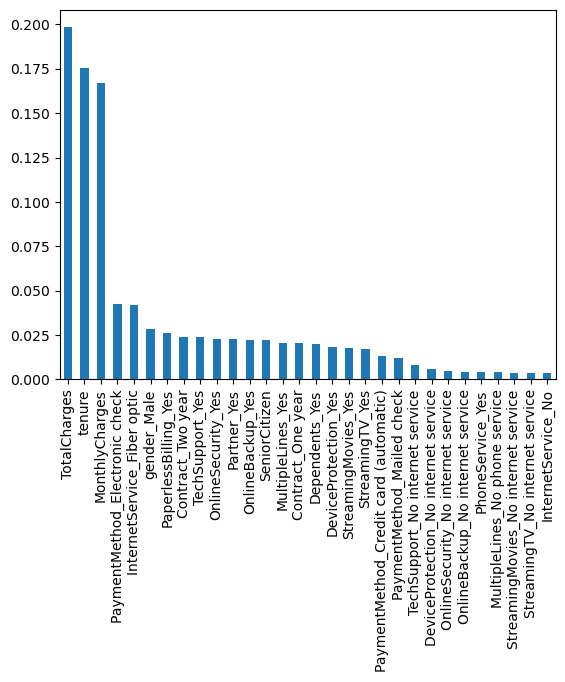

In [ ]:
x = pd.Series(np.abs(rf.feature_importances_), index=cols)

x.sort_values(ascending=False).plot(kind='bar')

In [ ]:
# Applying Smote
from imblearn.combine import SMOTEENN

In [ ]:
smote_enn = SMOTEENN()
X_r, y_r = smote_enn.fit_resample(X, y)
# Creating train set and test s
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_r, y_r, test_size=0.2, random_state=0)
print("Shape of X_train", Xr_train.shape)
print("Shape of X_test",  Xr_test.shape)
print("Shape of y_train", yr_train.shape)
print("Shape of y_test",  yr_test.shape)

Shape of X_train (4678, 30)
Shape of X_test (1170, 30)
Shape of y_train (4678,)
Shape of y_test (1170,)


In [ ]:
dt = DecisionTreeClassifier()
rf_re = RandomForestClassifier()

# dt.fit(X_train,y_train)
rf_re.fit(Xr_train, yr_train)

RandomForestClassifier()

In [ ]:
cols = Xr_train.columns

<Axes: >

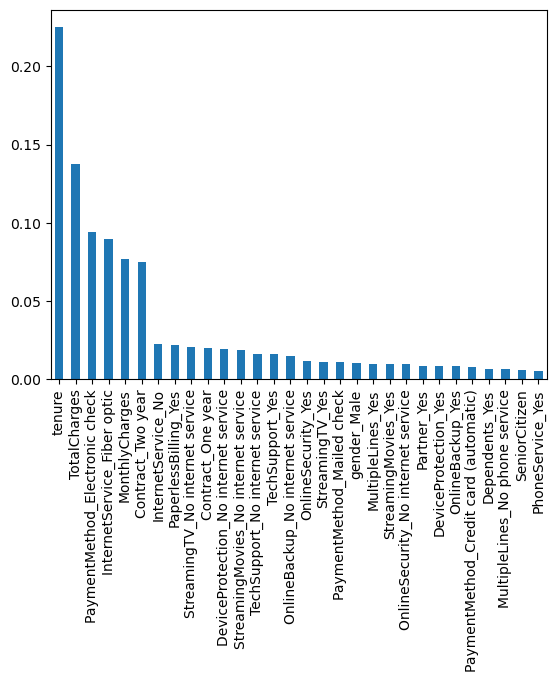

In [ ]:
x = pd.Series(np.abs(rf_re.feature_importances_), index=cols)

x.sort_values(ascending=False).plot(kind='bar')

# Building Machine Learning Models

## Evaluation Matrixes

### confusion matrix

In [ ]:

def Improved_cf_multiclass(cf_matrix):
    '''This function takes the confusion matrix as input and provides a labeled heatmap of the confusion matrix.'''
    # Defining labels
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    # Flattening the 2D array to one dimension
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    # Zipping curresponding label and value
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
    # Reshaping back to 2D array
    labels = np.asarray(labels).reshape(2, 2)

    # Creating a heatmap for the given confusion matrix with labels created
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    # Set title, x-label and y-label
    ax.set_title('Seaborn Confusion Matrix with labels\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    # Setting x-ticks and y-ticks
    ax.xaxis.set_ticklabels(['0', "1"])
    ax.yaxis.set_ticklabels(['0', "1"])
    # show the heatmap
    plt.show()

### Classification Report

In [ ]:


def classification_results(Y_true, Y_pred, scoring_list, average=None):
    '''Function to evaluate our model after training using different types  evaluation metrics and show all in a dataframe '''
    # Creating a deafult dictionary
    evaluation_dict = defaultdict(list)

    for count, scoring_metric in enumerate(scoring_list):
        # Appending the scoring metric's names to the dictionary
        evaluation_dict["scoring"].append(scoring_metric.__name__)

        # For accuracy score average=None
        if count == 0 or average is None:
            metric_value = scoring_metric((Y_true), (Y_pred))
        else:
            # For other metrics average=average
            metric_value = scoring_metric((Y_true), (Y_pred), average=average)

        # Appending the value of the curresponding metric to the dictionary
        evaluation_dict["Value"].append('{:f}'.format(metric_value))

    # Creating a dataframe from the dictionary
    evaluation_df = pd.DataFrame(evaluation_dict)
    return evaluation_df

In [ ]:

# Creating a list of evalation metrics
scoring_list = [accuracy_score, precision_score, recall_score, f1_score]

In [ ]:
sc = StandardScaler()
Xr_train_scaled = sc.fit_transform(Xr_train)
Xr_test_scaled = sc.transform(Xr_test)

## Logistic Regression

In [ ]:
# training the model
from sklearn.linear_model import LogisticRegression
log_reg_classifier = LogisticRegression(random_state=0)
log_reg_classifier.fit(Xr_train_scaled, yr_train)

LogisticRegression(random_state=0)

In [ ]:
# Making prediction on our train and test dataset
log_reg_pred_train = log_reg_classifier.predict(Xr_train_scaled)
log_reg_pred_test = log_reg_classifier.predict(Xr_test_scaled)

In [ ]:
# Storing train and test accuracy scores
log_reg_train_accuracy = accuracy_score(yr_train, log_reg_pred_train)
log_reg_test_accuracy = accuracy_score(yr_test, log_reg_pred_test)

# printing train and test accuracy scores
print("Training accuracy Score    : ", log_reg_train_accuracy)
print("Test accuracy Score : ", log_reg_test_accuracy)

# printing classification report for the performance of train and test set
print("\n", "Logistic Regression Classification Report for train dataset", "\n")
print(classification_report(yr_train, log_reg_pred_train))
print("Logistic Regression Classification Report for test dataset", "\n")
print(classification_report(yr_test, log_reg_pred_test))

Training accuracy Score    :  0.9318084651560496
Test accuracy Score :  0.9452991452991453

 Logistic Regression Classification Report for train dataset 

              precision    recall  f1-score   support

          No       0.93      0.92      0.93      2152
         Yes       0.93      0.94      0.94      2526

    accuracy                           0.93      4678
   macro avg       0.93      0.93      0.93      4678
weighted avg       0.93      0.93      0.93      4678

Logistic Regression Classification Report for test dataset 

              precision    recall  f1-score   support

          No       0.95      0.93      0.94       519
         Yes       0.95      0.96      0.95       651

    accuracy                           0.95      1170
   macro avg       0.95      0.94      0.94      1170
weighted avg       0.95      0.95      0.95      1170



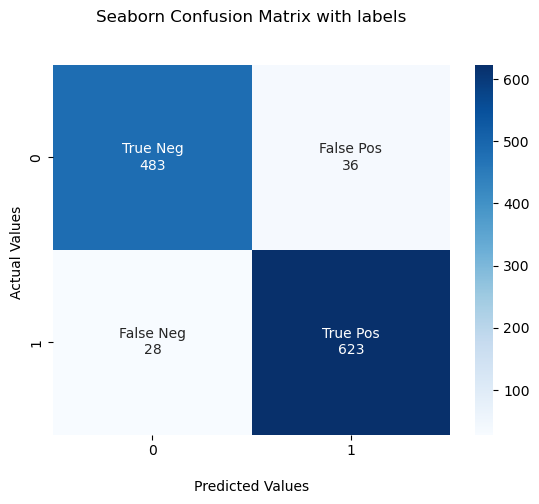

In [ ]:
cm = confusion_matrix(yr_test, log_reg_pred_test)
Improved_cf_multiclass(cm)

In [ ]:
# using weighted precision and weighted recall because of unbalanced data set
print("Performance of Logistic Regression model on the test dataset is:", '\n')
lr_evaluation_df = classification_results(
    yr_test, log_reg_pred_test, scoring_list)
lr_evaluation_df

Performance of Logistic Regression model on the test dataset is: 



ValueError: pos_label=1 is not a valid label. It should be one of ['No', 'Yes']

We are considering recall as matrix because of unbalanced data set. In this case we have 27:73 ratio for positive to negative. As per the scenario Our focus must be on FN. Because It very important to find people who are churned but the model doesn't predict that.

## K-NN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(
    n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(Xr_train_scaled, yr_train)

KNeighborsClassifier()

In [ ]:
# Making prediction on our train and test dataset
knn_pred_train = knn_classifier.predict(Xr_train_scaled)
knn_pred_test = knn_classifier.predict(Xr_test_scaled)

In [ ]:


# Storing train and test accuracy scores
train_accuracy = accuracy_score(yr_train, knn_pred_train)
test_accuracy = accuracy_score(yr_test, knn_pred_test)

# printing train and test accuracy scores
print("Training accuracy Score    : ", train_accuracy)
print("Test accuracy Score : ", test_accuracy)

# printing classification report for the performance of train and test set
print("\n", "KNN Classification Report for train dataset", "\n")
print(classification_report(yr_train, knn_pred_train))
print("KNN Classification Report for test dataset", "\n")
print(classification_report(yr_test, knn_pred_test))

Training accuracy Score    :  0.9329694323144104
Test accuracy Score :  0.9240174672489083

 KNN Classification Report for train dataset 

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2092
           1       0.92      0.97      0.94      2488

    accuracy                           0.93      4580
   macro avg       0.94      0.93      0.93      4580
weighted avg       0.93      0.93      0.93      4580

KNN Classification Report for test dataset 

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       522
           1       0.90      0.97      0.93       623

    accuracy                           0.92      1145
   macro avg       0.93      0.92      0.92      1145
weighted avg       0.93      0.92      0.92      1145



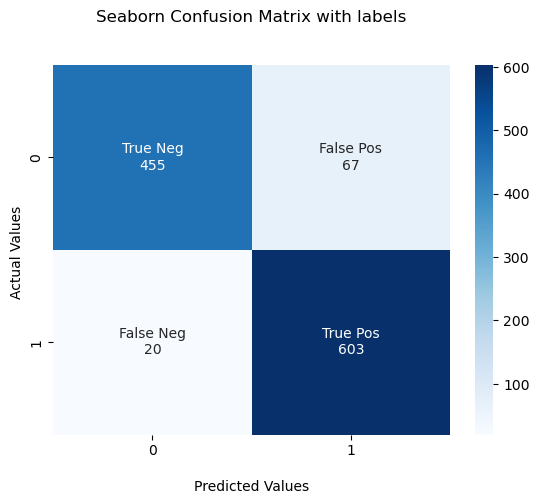

In [ ]:
cm = confusion_matrix(yr_test, knn_pred_test)
Improved_cf_multiclass(cm)

In [ ]:
# using weighted precision and weighted recall because of unbalanced data set
print("Performance of KNN model on the test dataset is:", '\n')
knn_evaluation_df = classification_results(
    yr_test, knn_pred_test, scoring_list)
knn_evaluation_df

Performance of KNN model on the test dataset is: 



,scoring,Value
0,accuracy_score,0.924017
1,precision_score,0.900000
2,recall_score,0.967897
3,f1_score,0.932715


## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=0)
svm_classifier.fit(Xr_train_scaled, yr_train)

SVC(kernel='linear', random_state=0)

In [ ]:
# Making prediction on our train and test dataset
svm_pred_train = svm_classifier.predict(Xr_train_scaled)
svm_pred_test = svm_classifier.predict(Xr_test_scaled)

In [ ]:

# Storing train and test accuracy scores
train_accuracy = accuracy_score(yr_train, svm_pred_train)
test_accuracy = accuracy_score(yr_test, svm_pred_test)

# printing train and test accuracy scores
print("Training accuracy Score    : ", train_accuracy)
print("Test accuracy Score : ", test_accuracy)

# printing classification report for the performance of train and test set
print("\n", "SVM Classification Report for train dataset", "\n")
print(classification_report(yr_train, svm_pred_train))
print("SVM Classification Report for test dataset", "\n")
print(classification_report(yr_test, svm_pred_test))

Training accuracy Score    :  0.9384279475982533
Test accuracy Score :  0.9414847161572052

 SVM Classification Report for train dataset 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2092
           1       0.95      0.94      0.94      2488

    accuracy                           0.94      4580
   macro avg       0.94      0.94      0.94      4580
weighted avg       0.94      0.94      0.94      4580

SVM Classification Report for test dataset 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       522
           1       0.96      0.94      0.95       623

    accuracy                           0.94      1145
   macro avg       0.94      0.94      0.94      1145
weighted avg       0.94      0.94      0.94      1145



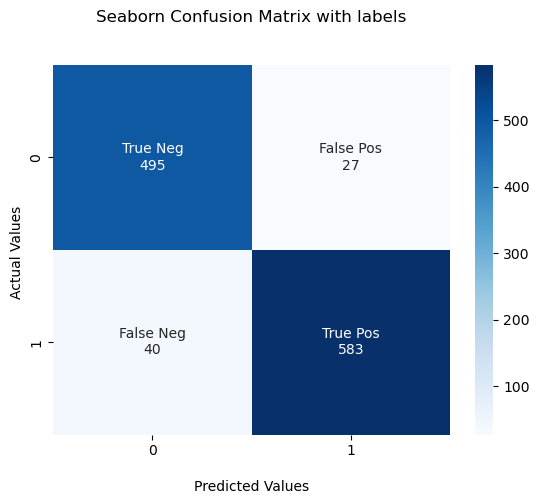

In [ ]:
cm = confusion_matrix(yr_test, svm_pred_test)
Improved_cf_multiclass(cm)

In [ ]:
# using weighted precision and weighted recall because of unbalanced data set
print("Performance of SVM model on the test dataset is:", '\n')
svm_evaluation_df = classification_results(
    yr_test, svm_pred_test, scoring_list)
svm_evaluation_df

Performance of SVM model on the test dataset is: 



,scoring,Value
0,accuracy_score,0.941485
1,precision_score,0.955738
2,recall_score,0.935795
3,f1_score,0.945661


## Kernal Support Vector Machine (K-SVM)

In [ ]:
from sklearn.svm import SVC
k_svm_classifier = SVC(kernel='rbf', random_state=0)
k_svm_classifier.fit(Xr_train_scaled, yr_train)

SVC(random_state=0)

In [ ]:
# Making prediction on our train and test dataset
k_svm_pred_train = k_svm_classifier.predict(Xr_train_scaled)
k_svm_pred_test = k_svm_classifier.predict(Xr_test_scaled)

In [ ]:

# Storing train and test accuracy scores
k_svm_train_accuracy = accuracy_score(yr_train, k_svm_pred_train)
k_svm_test_accuracy = accuracy_score(yr_test, k_svm_pred_test)

# printing train and test accuracy scores
print("Training accuracy Score    : ", train_accuracy)
print("Test accuracy Score : ", test_accuracy)

# printing classification report for the performance of train and test set
print("\n", "Kernal-SVM Classification Report for train dataset", "\n")
print(classification_report(yr_train, k_svm_pred_train))
print("Kernal-SVM Classification Report for test dataset", "\n")
print(classification_report(yr_test, k_svm_pred_test))

Training accuracy Score    :  0.9384279475982533
Test accuracy Score :  0.9414847161572052

 Kernal-SVM Classification Report for train dataset 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2092
           1       0.95      0.95      0.95      2488

    accuracy                           0.94      4580
   macro avg       0.94      0.94      0.94      4580
weighted avg       0.94      0.94      0.94      4580

Kernal-SVM Classification Report for test dataset 

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       522
           1       0.94      0.93      0.94       623

    accuracy                           0.93      1145
   macro avg       0.93      0.93      0.93      1145
weighted avg       0.93      0.93      0.93      1145



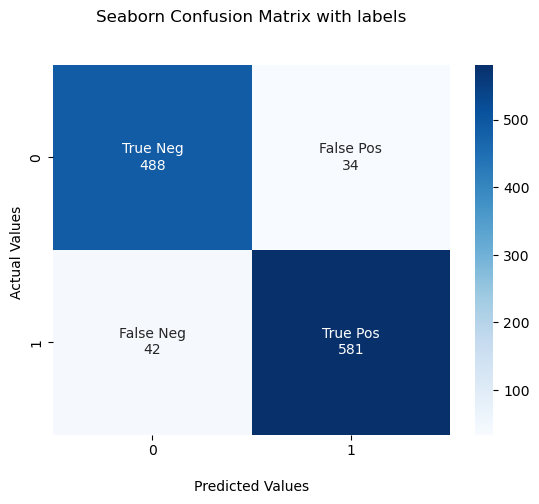

In [ ]:
cm = confusion_matrix(yr_test, k_svm_pred_test)
Improved_cf_multiclass(cm)

In [ ]:
# using weighted precision and weighted recall because of unbalanced data set
print("Performance of Kernal-SVM model on the test dataset is:", '\n')
k_svm_evaluation_df = classification_results(
    yr_test, k_svm_pred_test, scoring_list)
k_svm_evaluation_df

Performance of Kernal-SVM model on the test dataset is: 



,scoring,Value
0,accuracy_score,0.933624
1,precision_score,0.944715
2,recall_score,0.932584
3,f1_score,0.938611


## NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(Xr_train_scaled, yr_train)

GaussianNB()

In [ ]:
# Making prediction on our train and test dataset
nb_pred_train = nb_classifier.predict(Xr_train_scaled)
nb_test_pred = nb_classifier.predict(Xr_test_scaled)

In [ ]:

# Storing train and test accuracy scores
train_accuracy = accuracy_score(yr_train, nb_pred_train)
test_accuracy = accuracy_score(yr_test, nb_test_pred)

# printing train and test accuracy scores
print("Training accuracy Score    : ", train_accuracy)
print("Test accuracy Score : ", test_accuracy)

# printing classification report for the performance of train and test set
print("\n", "Naive Bayes Classification Report for train dataset", "\n")
print(classification_report(yr_train, nb_pred_train))
print("Naive Bayes Classification Report for test dataset", "\n")
print(classification_report(yr_test, nb_test_pred))

Training accuracy Score    :  0.9028384279475983
Test accuracy Score :  0.9021834061135371

 Naive Bayes Classification Report for train dataset 

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      2092
           1       0.88      0.95      0.91      2488

    accuracy                           0.90      4580
   macro avg       0.91      0.90      0.90      4580
weighted avg       0.90      0.90      0.90      4580

Naive Bayes Classification Report for test dataset 

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       522
           1       0.89      0.94      0.91       623

    accuracy                           0.90      1145
   macro avg       0.91      0.90      0.90      1145
weighted avg       0.90      0.90      0.90      1145



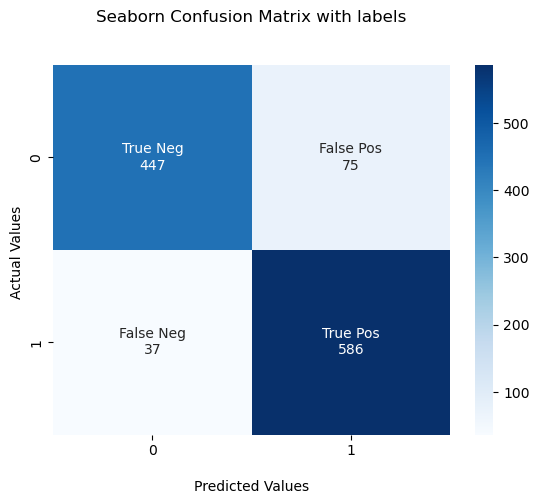

In [ ]:
cm = confusion_matrix(yr_test, nb_test_pred)
Improved_cf_multiclass(cm)

In [ ]:
# using weighted precision and weighted recall because of unbalanced data set
print("Performance of Naive Bayes model on the test dataset is:", '\n')
nb_evaluation_df = classification_results(
    yr_test, nb_test_pred, scoring_list, "weighted")
nb_evaluation_df

Performance of Naive Bayes model on the test dataset is: 



,scoring,Value
0,accuracy_score,0.902183
1,precision_score,0.903412
2,recall_score,0.902183
3,f1_score,0.901783


## DECISION Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtr_classifier = DecisionTreeClassifier()
dtr_classifier.fit(Xr_train, yr_train)

DecisionTreeClassifier()

In [ ]:
# Making prediction on our train and test dataset
dt_pred_train = dtr_classifier.predict(Xr_train)
dt_test_pred = dtr_classifier.predict(Xr_test)

In [ ]:


# Storing train and test accuracy scores
train_accuracy = accuracy_score(yr_train, dt_pred_train)
test_accuracy = accuracy_score(yr_test, dt_test_pred)

# printing train and test accuracy scores
print("Training accuracy Score    : ", train_accuracy)
print("Test accuracy Score : ", test_accuracy)

# printing classification report for the performance of train and test set
print("\n", "Decision Tree Classification Report for train dataset", "\n")
print(classification_report(yr_train, dt_pred_train))
print("Decision Tree Classification Report for test dataset", "\n")
print(classification_report(yr_test, dt_test_pred))

Training accuracy Score    :  1.0
Test accuracy Score :  0.9362445414847161

 Decision Tree Classification Report for train dataset 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2092
           1       1.00      1.00      1.00      2488

    accuracy                           1.00      4580
   macro avg       1.00      1.00      1.00      4580
weighted avg       1.00      1.00      1.00      4580

Decision Tree Classification Report for test dataset 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       522
           1       0.94      0.95      0.94       623

    accuracy                           0.94      1145
   macro avg       0.94      0.94      0.94      1145
weighted avg       0.94      0.94      0.94      1145



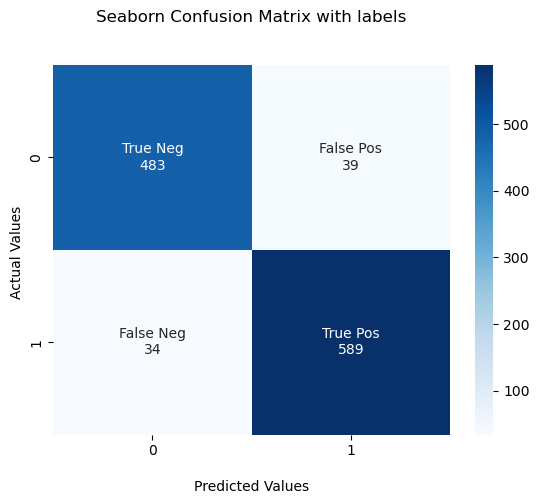

In [ ]:
cm = confusion_matrix(yr_test, dt_test_pred)
Improved_cf_multiclass(cm)

In [ ]:
# using weighted precision and weighted recall because of unbalanced data set
print("Performance of Decision Tree model on the test dataset is:", '\n')
dt_evaluation_df = classification_results(
    yr_test, dt_test_pred, scoring_list)
dt_evaluation_df

Performance of Decision Tree model on the test dataset is: 



,scoring,Value
0,accuracy_score,0.936245
1,precision_score,0.937898
2,recall_score,0.945425
3,f1_score,0.941647


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(
    n_estimators=10, criterion='entropy', random_state=0)
rf_classifier.fit(Xr_train, yr_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
# Making prediction on our train and test dataset
rf_pred_train = rf_classifier.predict(Xr_train)
rf_pred_test = rf_classifier.predict(Xr_test)

In [ ]:


# Storing train and test accuracy scores
train_accuracy = accuracy_score(yr_train, rf_pred_train)
test_accuracy = accuracy_score(yr_test, rf_pred_test)

# printing train and test accuracy scores
print("Training accuracy Score    : ", train_accuracy)
print("Test accuracy Score : ", test_accuracy)

# printing classification report for the performance of train and test set
print("\n", "Random Forest Classification Report for train dataset", "\n")
print(classification_report(yr_train, rf_pred_train))
print("Random Classification Report for test dataset", "\n")
print(classification_report(yr_test, rf_pred_test))

Training accuracy Score    :  0.9958515283842795
Test accuracy Score :  0.9528384279475982

 Random Forest Classification Report for train dataset 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2092
           1       1.00      0.99      1.00      2488

    accuracy                           1.00      4580
   macro avg       1.00      1.00      1.00      4580
weighted avg       1.00      1.00      1.00      4580

Random Classification Report for test dataset 

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       522
           1       0.96      0.96      0.96       623

    accuracy                           0.95      1145
   macro avg       0.95      0.95      0.95      1145
weighted avg       0.95      0.95      0.95      1145



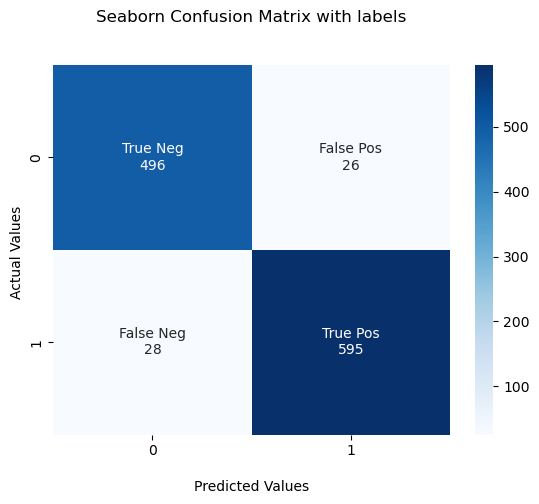

In [ ]:
cm = confusion_matrix(yr_test, rf_pred_test)
Improved_cf_multiclass(cm)

In [ ]:
# using weighted precision and weighted recall because of unbalanced data set
print("Performance of Random Forest model on the test dataset is:", '\n')
rf_evaluation_df = classification_results(
    yr_test, rf_pred_test, scoring_list,)
rf_evaluation_df

Performance of Random Forest model on the test dataset is: 



,scoring,Value
0,accuracy_score,0.952838
1,precision_score,0.958132
2,recall_score,0.955056
3,f1_score,0.956592


## Evaluation

In [ ]:
def evaluate_all_models(evaluation_dfs, model_names):
    '''Function to create a dataframe containing the scores of different evaluation metrics
      for different models'''

    # Creating an empty list to store the transposed evaluation dfs
    transposed_evaluation_df = []

    # Transposing all the evaluation df that we have created till now and saving all of them in transposed_evaluation_df
    for e_df in evaluation_dfs:
        e_df = e_df.set_index("scoring")
        e_df.index.names = [None]
        e_df = e_df.transpose()
        transposed_evaluation_df.append(e_df)

    # Concatenating all the individual transposed evaluation df into single df
    all_model_evaluation_df = pd.concat(transposed_evaluation_df, axis=0)
    all_model_evaluation_df.insert(0, "Model_Name", model_names)
    all_model_evaluation_df.reset_index(drop=True, inplace=True)
    all_model_evaluation_df.sort_values(
        by='accuracy_score', ascending=False, inplace=True)

    return all_model_evaluation_df

In [ ]:
# Creating a list of all the model names that we have evaluated till now
model_names = ["Logistic Regression", "KNN", "SVM", "Kernal-SVM", "Naive Bayes",
               "Decision Tree", "Random Forest"]

# Creates a list of all evaluations dataframe made for different models
evaluation_df = [lr_evaluation_df, knn_evaluation_df,
                 svm_evaluation_df, k_svm_evaluation_df, nb_evaluation_df, dt_evaluation_df, rf_evaluation_df]

In [ ]:
# Calling the function 'evaluate_all_models' to get final comparison dataframe based on different evaluation metrics for all the models
all_model_df = evaluate_all_models(evaluation_df, model_names)

In [ ]:
# Converting the datatype of scores from object to float
all_model_df[['accuracy_score',	'precision_score',	'recall_score',	'f1_score']] = all_model_df[['accuracy_score',
                                                                                                'precision_score', 'recall_score',	'f1_score']].apply(lambda x: x.astype(str).astype(float))
print("Comparison dataframe for all the models based on different evaluation metrics on the test dataset:", "\n")
# Scores are rounded up to 2 decimals
all_model_df.reset_index(inplace=True, drop=True)
all_model_df.sort_values(by="accuracy_score", ascending=False).round(3)

Comparison dataframe for all the models based on different evaluation metrics on the test dataset: 



,Model_Name,accuracy_score,precision_score,recall_score,f1_score
0,Random Forest,0.953,0.958,0.955,0.957
1,Logistic Regression,0.945,0.955,0.944,0.949
2,SVM,0.941,0.956,0.936,0.946
3,Decision Tree,0.936,0.938,0.945,0.942
4,Kernal-SVM,0.934,0.945,0.933,0.939
5,KNN,0.924,0.900,0.968,0.933
6,Naive Bayes,0.902,0.903,0.902,0.902


We are considering Recall as matrix because of imbalanced data set.Based On that, We are selecting Logistic Regression as the best model because it has a slight improvement as compared to kernal-svm.

# Cross Validation And Hyper Parameter Tuning

## Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(
    estimator=rf_classifier, X=Xr_train_scaled, y=yr_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.17 %
Standard Deviation: 0.95 %


## Applying Grid Search to find the best model and the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
# Creating parameter dictionary for hyperparameter tuning

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
# Performing cross validation and hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=-1)

# Fitting the model on the train dataset
grid_search.fit(Xr_train, yr_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]},
             scoring='accuracy')

In [ ]:
# Making prediction on our train and test dataset
rf_grid_pred_train = grid_search.predict(Xr_train)
rf_grid_pred_test = grid_search.predict(Xr_test)

In [ ]:
# Storing train and test accuracy scores
rf_grid_train_accuracy = accuracy_score(yr_train, rf_grid_pred_train)
rf_grid_test_accuracy = accuracy_score(yr_test, rf_grid_pred_test)


# Obtaining best parameters
best_parameters = grid_search.best_params_
print("Best hyperparameter for the random forest Model are:", best_parameters)
best_accuracy = grid_search.best_score_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))


# printing train and test accuracy scores
print("Training accuracy Score   : ", grid_search.score(Xr_train, yr_train))
print("Test accuracy Score : ", rf_grid_test_accuracy)


# printing classification report for the performance of train and test set
print("\n", "Random forest model Grid Model-Classification Report for train dataset", "\n")
print(classification_report(rf_grid_pred_train, yr_train))
print("Logistic Regression Grid Model-Classification Report for test dataset", "\n")
print(classification_report(rf_grid_pred_test, yr_test))

Best hyperparameter for the random forest Model are: {'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 9, 'n_estimators': 50}
Best Accuracy: 91.46 %
Training accuracy Score   :  0.9161572052401746
Test accuracy Score :  0.9266375545851528

 Random forest model Grid Model-Classification Report for train dataset 

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2002
           1       0.94      0.91      0.92      2578

    accuracy                           0.92      4580
   macro avg       0.91      0.92      0.92      4580
weighted avg       0.92      0.92      0.92      4580

Logistic Regression Grid Model-Classification Report for test dataset 

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       508
           1       0.94      0.92      0.93       637

    accuracy                           0.93      1145
   macro avg       0.92      0.93      0.93      1145
weight

In [ ]:
# Evaluating performance of prediction on the test data using different evaluation metrics
grid_evaluation_df = classification_results(
    yr_test, rf_grid_pred_test, scoring_list)
print("Performance of Random Forest Grid Model on the test dataset is:", '\n')
grid_evaluation_df

Performance of Random Forest Grid Model on the test dataset is: 



,scoring,Value
0,accuracy_score,0.926638
1,precision_score,0.923077
2,recall_score,0.943820
3,f1_score,0.933333


# Confusion matrix for best model.


Confusion matrix for the best model-logistic Regression Grid is:


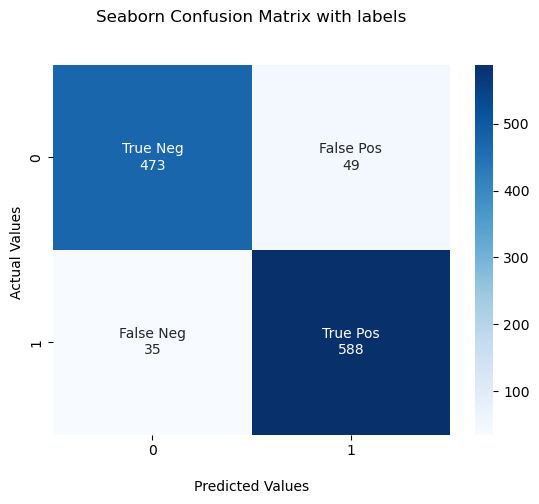

In [ ]:
# Confusion matrix for the best model:LinearSVC Grid Model
print("Confusion matrix for the best model-logistic Regression Grid is:")
Improved_cf_multiclass(confusion_matrix(yr_test, rf_grid_pred_test))

In [ ]:
# save model
# Save the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(grid_search.best_estimator_, f)

# Load the model from a file
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
Xr_test

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5401,0,33,95.764043,3213.864876,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
214,0,70,57.800000,4039.300000,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0
4486,0,5,47.525571,222.004967,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
29,0,45,25.900000,1216.600000,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0
195,0,2,19.950000,47.700000,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,1,1,69.600000,69.600000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2818,0,9,94.750000,889.900000,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
799,0,67,19.400000,1284.200000,1,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,1,0,0
5601,0,1,78.549701,78.549701,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
model.score(Xr_test, yr_test)

0.9266375545851528